In [1]:
import numpy as np 
import matplotlib.pyplot as plt

/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_20872/1468469935.py:3: RuntimeWarning: invalid value encountered in power
  X = nu[3:] ** nu_bis[:10**4 -3]


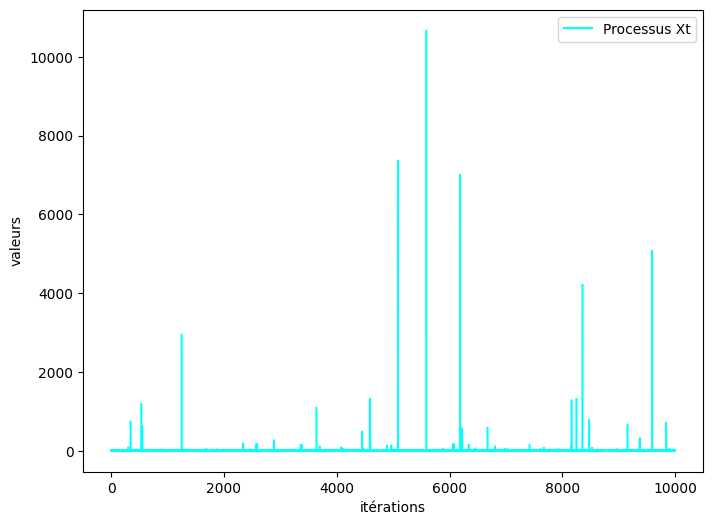

In [13]:
nu = np.random.normal(size = 10**4)
nu_bis = nu.copy()
X = nu[3:] ** nu_bis[:10**4 -3]

plt.figure(figsize=(8,6))
plt.plot(list(range(len(X))), X, label = "Processus Xt", color = 'cyan')
#plt.plot(list(range(len(X))), X**2, label = "Processus Xt**2", color = 'orange')
plt.xlabel("itérations")
plt.ylabel("valeurs")
plt.legend()
plt.show()

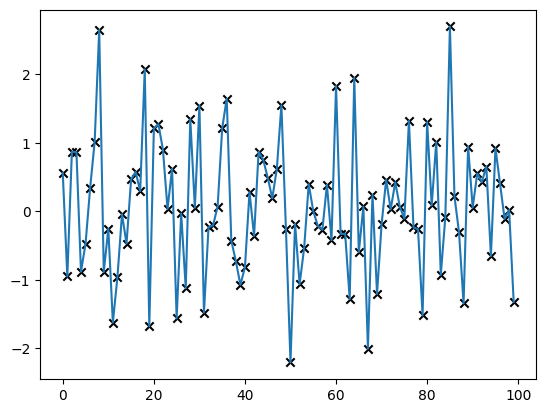

In [15]:
# Trajectoire d'un bruit blanc gaussien de variance 1
t = 100 
serie = [np.random.normal(0,1) for _ in range(t)]
plt.plot(range(t), serie)
plt.scatter(range(t), serie, color = 'black', marker = 'x')

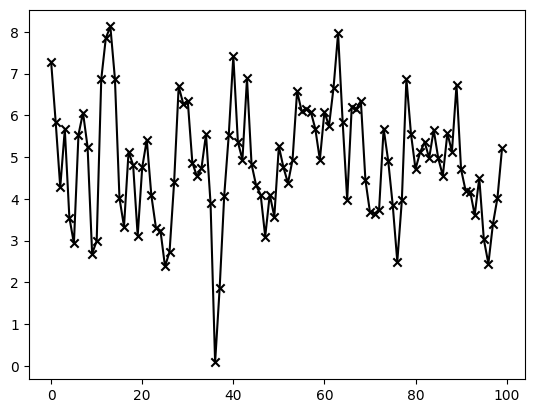

In [17]:
#Trajectoire d'un MA(1)

def MA1(m, theta, taille=100):
    WN = np.random.normal(0,1,size=taille)
    X = [m + WN[0]] + [m + WN[i] + theta*WN[i-1] for i in range(1,taille)]
    return X

X = MA1(5, 0.8)
plt.plot(range(100), X, color = "black")
plt.scatter(range(100), X, marker = 'x', color = "black")

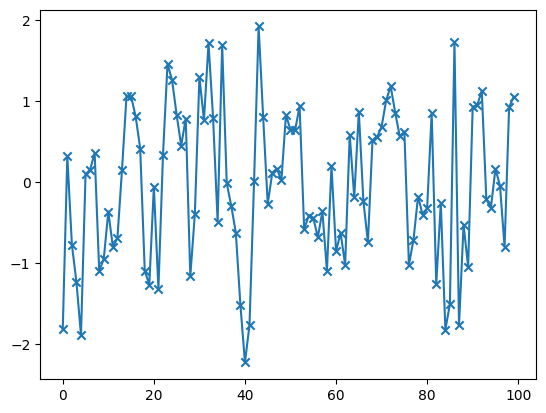

In [20]:
#Trajectoire d'un AR(1)

def AR1(phi, taille=100):
    WN = np.random.normal(0,1, size=taille)
    X = [WN[0]] 
    for i in range(1,taille): 
        X.append(phi*X[i-1] + WN[i]) 
    return X 

X = AR1(0.5, taille=100)
plt.plot(range(100), X)
plt.scatter(range(100), X, marker = 'x')

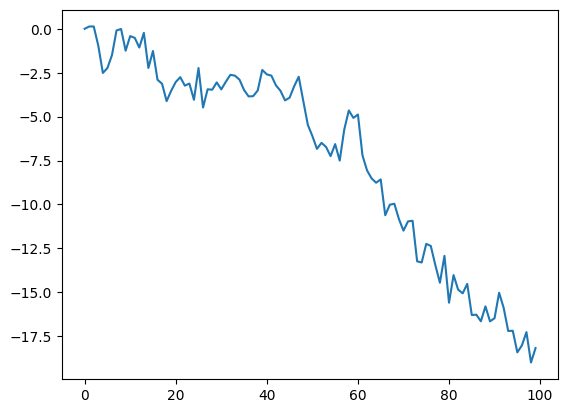

In [22]:
# Exemple de Random Walk 
taille=100
X = [0]
WN = np.random.normal(0,1,size=taille)
for i in range(1,taille):
    X.append(X[i-1] + WN[i])

plt.plot(range(taille), X)

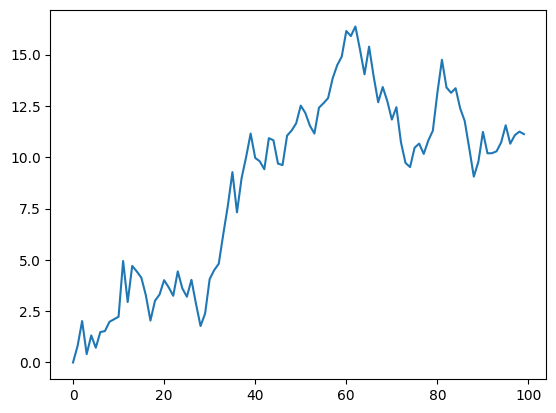

In [28]:
# Random Walk avec trend 
def RW_trend(a,b,taille=100):
    X = [a]
    WN = np.random.normal(0,1,size=taille)
    for i in range(1,taille):
        X.append(X[i-1] + b + WN[i])
    return X
X = RW_trend(0, 0.1)
plt.plot(range(100), X)

/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_6179/1659825022.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a0 = np.float(1.5)
/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_6179/1659825022.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a1 = np.float(3.2)


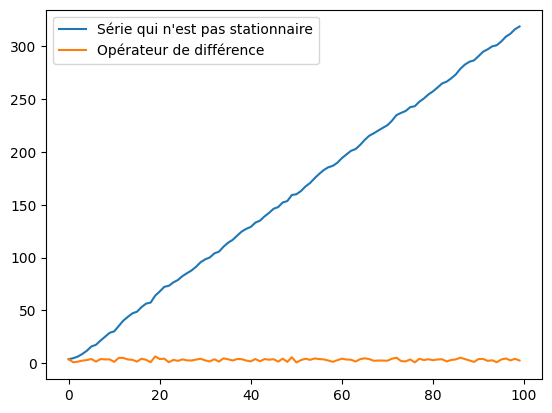

In [41]:
# Rendre une série stationnaire 
a0 = np.float(1.5)
a1 = np.float(3.2)
Y = np.array(AR1(0.5, taille=100))
time = np.array([i for i in range(100)])
X = a0 + a1 * time + Y
X_1 = np.array([0] + list(X[:-1]))
diff1_X = X - X_1

plt.plot(time, X, label = "Série qui n'est pas stationnaire")
plt.plot(time, diff1_X, label = "Opérateur de différence")
plt.legend()
plt.show()